
## In this exercise, we will use the HR dataset and understand the following using caret package:

> 1. Building the decision tree model
2. Creating the Confusion Matrix and ROC plot on train data
3. Creating the Confusion Matrix and ROC plot on test data

There are bugs/missing code in the entire exercise. The participants are expected to work upon them.
***
***

## Here are some useful links:

> 1. **[Read](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/dummy.htm)** about interaction variable coding
2. Refer **[link](http://www.statmethods.net/input/valuelabels.html)** to know about adding lables to factors
3. Refer **[link](http://stackoverflow.com/questions/2342472/recode-relevel-data-frame-factors-with-different-levels)** to relvel factor variables
4. **[Read](http://stats.stackexchange.com/questions/88485/variable-is-significant-through-stepwise-regression-but-not-in-final-models-sum)** about the issues in stepwise regression
5. **[Read](http://topepo.github.io/caret/training.html)** about the modelling activity via caret package
6. The **[complete](http://topepo.github.io/caret/available-models.html)** list of tuning parameter for different models in caret package


***

# Code starts here
We are going to use below mentioned libraries for demonstrating logistic regression:



In [1]:
library(caret)    #for data partition. Model building
#library(Deducer) #for ROC plot
library(ROCR)     #for ROC plot (other way)
#library(rattle)   #for plotting tree
library(rpart)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess




## Data Import and Manipulation

### 1. Importing a data set

_Give the correct path to the data_



In [2]:
raw_df <- read.csv("/Users/Rahul/Documents/Datasets/IMB533_HR_Data_No_Missing_Value.csv", header = TRUE,sep = ",",na.strings = c(""," ", "NA"))


Note that `echo = FALSE` parameter prevents printing the R code that generated the
plot.

### 2. Structure and Summary of the dataset



In [3]:
str(raw_df)
summary(raw_df)

'data.frame':	8995 obs. of  18 variables:
 $ SLNO                       : int  1 2 3 4 5 6 7 9 11 12 ...
 $ Candidate.Ref              : int  2110407 2112635 2112838 2115021 2115125 2117167 2119124 2127572 2138169 2143362 ...
 $ DOJ.Extended               : Factor w/ 2 levels "No","Yes": 2 1 1 1 2 2 2 2 1 1 ...
 $ Duration.to.accept.offer   : int  14 18 3 26 1 17 37 16 1 6 ...
 $ Notice.period              : int  30 30 45 30 120 30 30 0 30 30 ...
 $ Offered.band               : Factor w/ 4 levels "E0","E1","E2",..: 3 3 3 3 3 2 3 2 2 2 ...
 $ Pecent.hike.expected.in.CTC: num  -20.8 50 42.8 42.8 42.6 ...
 $ Percent.hike.offered.in.CTC: num  13.2 320 42.8 42.8 42.6 ...
 $ Percent.difference.CTC     : num  42.9 180 0 0 0 ...
 $ Joining.Bonus              : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Candidate.relocate.actual  : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ Gender                     : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 2 1 1 2 ...
 $ 

      SLNO       Candidate.Ref     DOJ.Extended Duration.to.accept.offer
 Min.   :    1   Min.   :2109586   No :4788     Min.   :  0.00          
 1st Qu.: 3208   1st Qu.:2386476   Yes:4207     1st Qu.:  3.00          
 Median : 5976   Median :2807482                Median : 10.00          
 Mean   : 5971   Mean   :2843647                Mean   : 21.43          
 3rd Qu.: 8739   3rd Qu.:3300060                3rd Qu.: 33.00          
 Max.   :12333   Max.   :3836076                Max.   :224.00          
                                                                        
 Notice.period    Offered.band Pecent.hike.expected.in.CTC
 Min.   :  0.00   E0: 211      Min.   :-68.83             
 1st Qu.: 30.00   E1:5568      1st Qu.: 27.27             
 Median : 30.00   E2:2711      Median : 40.00             
 Mean   : 39.29   E3: 505      Mean   : 43.86             
 3rd Qu.: 60.00                3rd Qu.: 53.85             
 Max.   :120.00                Max.   :359.77             
   



Create a new data frame and store the raw data copy. This is being done to have a copy of the raw data intact for further manipulation if needed.



In [4]:
filter_df <- na.omit(raw_df) # listwise deletion of missing


### 3. Create train and test dataset

#### Reserve 80% for **_training_** and 20% of **_test_**

_Correct the error in the below code chunk_


In [5]:
set.seed(2341)
trainIndex <- createDataPartition(filter_df$Status, p = 0.80, list = FALSE)
train_df <- filter_df[trainIndex,]
test_df <- filter_df[-trainIndex,]


We can pull the specific attribute needed to build the model is another data frame. This agian is more of a hygine practice to not touch the **train** and **test** data set directly.

_Correct the error in the below code chunk_


In [6]:
dt_train_df <- as.data.frame(train_df[,c("DOJ.Extended",
                                             "Duration.to.accept.offer",
                                             "Notice.period",
                                             "Offered.band",
                                             "Percent.difference.CTC",
                                             "Joining.Bonus",
                                             "Gender",
                                             "Candidate.Source",
                                             "Rex.in.Yrs",
                                             "LOB",
                                             "Location",
                                             "Age",
                                             "Status"
)])


_Correct the error in the below code chunk_


In [7]:
dt_test_data <- as.data.frame(test_df[,c("DOJ.Extended",
                                           "Duration.to.accept.offer",
                                           "Notice.period",
                                           "Offered.band",
                                           "Percent.difference.CTC",
                                           "Joining.Bonus",
                                           "Gender",
                                           "Candidate.Source",
                                           "Rex.in.Yrs",
                                           "LOB",
                                           "Location",
                                           "Age",
                                           "Status"
)])


***

## Model Building: Using the **caret()** package
There are a number of models which can be built using caret package. To get the names of all the models possible.



In [8]:
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ORFlog"             
[139] "ORFpls"              "ORFridge"            "ORFsvm"             
[142] "ownn"                "pam"                 "parRF"              
[145] "PART"                "partDSA"             "pcaNNet"            
[148] "pcr"                 "pda"                 "pda2"               
[151] "penalized"           "PenalizedLDA"        "plr"                
[154] "pls"                 "plsRglm"             "polr"               
[157] "ppr"                 "PRIM"                "protoclass"         
[160] "pythonKnnReg"        "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         


To get the info on specific model:



In [9]:
getModelInfo()$glmnet$type

[1] "Regression"     "Classification"


The below chunk of code is standarized way of building model using caret package. Setting in the control parameters for the model.



In [10]:
objControl <- trainControl(method = "cv", number = 2,
                           summaryFunction = twoClassSummary,
                           classProbs = TRUE,
                           savePredictions = TRUE)


Using search grid to fine tune the model


In [11]:
search_grid <- expand.grid(cp=c(0.001,0.002, 0.003,0.004))


The model building starts here.
> 1. **metric= "ROC"** uses ROC curve to select the best model.Accuracy, Kappa are other options. To use this change twoClassSummary to defaultSummary in **ObjControl**
2. **verbose = FALSE**: does not show the processing output on console

The factor names at times may not be consistent. R may expect **"Not.Joined"** but the actual level may be **"Not Joined"** This is corrected by using **make.names()** function to give syntactically valid names. Type ?rpart.control in console to get the list of parameters which control the tree growth.



In [12]:
#dt_train_df$StatusFactor <- as.factor(ifelse(dt_train_df$Status == "Joined", 1,0))
set.seed(766)
levels(dt_train_df$Status) <- make.names(levels(factor(dt_train_df$Status)))
formula <- as.formula(Status~.)

dt_caret_model <- caret:::train.formula(formula,
                      dt_train_df,
                      method = 'rpart', #method missing
                      metric = "ROC",
                      maxdepth = 2,                  
                      trControl = objControl,
                     tuneGrid = search_grid)



## Model Evaluation

### 1. One useful plot from caret package is the variable importance plot

In case you get an error "Invalid Graphic state", uncomment the line below


In [13]:
dt_caret_model$bestTune
(dt_caret_model$finalModel)
#dev.off()
#fancyRpartPlot(dt_caret_model$finalModel)

cp
0.001


n= 7197 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 7197 1346 Joined (0.81297763 0.18702237)  
      2) Notice.period< 37.5 4748  651 Joined (0.86288964 0.13711036)  
        4) Duration.to.accept.offer< 99.5 4719  628 Joined (0.86692096 0.13307904)  
          8) Duration.to.accept.offer< 55.5 4504  572 Joined (0.87300178 0.12699822) *
          9) Duration.to.accept.offer>=55.5 215   56 Joined (0.73953488 0.26046512)  
           18) GenderMale< 0.5 36    3 Joined (0.91666667 0.08333333) *
           19) GenderMale>=0.5 179   53 Joined (0.70391061 0.29608939)  
             38) Duration.to.accept.offer>=61.5 133   33 Joined (0.75187970 0.24812030)  
               76) Duration.to.accept.offer< 70.5 65    7 Joined (0.89230769 0.10769231) *
               77) Duration.to.accept.offer>=70.5 68   26 Joined (0.61764706 0.38235294)  
                154) DOJ.ExtendedYes>=0.5 54   16 Joined (0.70370370 0.29629630) *
                155) DOJ.ExtendedYes<



### 2. The prediction and confusion Matrix on train data.

The syntax for prediction in caret is almost similar expect the the **type** attribute expects input as **'raw'** or **'prob'**. In case of prob, the predicted value holds the probability of both positive and negative class.



In [14]:
#Missing code. May result in error
levels(dt_train_df$Status) <- make.names(levels(factor(dt_train_df$Status)))
caretPredictedClass <- predict(object = dt_caret_model, dt_train_df[,1:12], type = 'raw')
confusionMatrix(caretPredictedClass,dt_train_df$Status)

Confusion Matrix and Statistics

            Reference
Prediction   Joined Not.Joined
  Joined       5735       1017
  Not.Joined    116        329
                                         
               Accuracy : 0.8426         
                 95% CI : (0.834, 0.8509)
    No Information Rate : 0.813          
    P-Value [Acc > NIR] : 2.667e-11      
                                         
                  Kappa : 0.3026         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9802         
            Specificity : 0.2444         
         Pos Pred Value : 0.8494         
         Neg Pred Value : 0.7393         
             Prevalence : 0.8130         
         Detection Rate : 0.7969         
   Detection Prevalence : 0.9382         
      Balanced Accuracy : 0.6123         
                                         
       'Positive' Class : Joined         
                                         


### 3. Confusion Matrix on the test data

The **predict** function is used to get the predicted class on the new dataset.


In [15]:
levels(dt_test_data$Status) <- make.names(levels(factor(dt_test_data$Status)))
dtCaretTestPredictedClass = predict(dt_caret_model, dt_test_data, type = "raw")
confusionMatrix(dtCaretTestPredictedClass,dt_test_data$Status)

Confusion Matrix and Statistics

            Reference
Prediction   Joined Not.Joined
  Joined       1415        276
  Not.Joined     47         60
                                          
               Accuracy : 0.8204          
                 95% CI : (0.8018, 0.8378)
    No Information Rate : 0.8131          
    P-Value [Acc > NIR] : 0.2256          
                                          
                  Kappa : 0.1985          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9679          
            Specificity : 0.1786          
         Pos Pred Value : 0.8368          
         Neg Pred Value : 0.5607          
             Prevalence : 0.8131          
         Detection Rate : 0.7870          
   Detection Prevalence : 0.9405          
      Balanced Accuracy : 0.5732          
                                          
       'Positive' Class : Joined          
                                   



### 4. ROC Plot on the test data

ROCR package can be used to evaluate the model performace on the test data. The same package can also be used to get the model performace on the test data.



An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.6590654


Slot "alpha.values":
list()


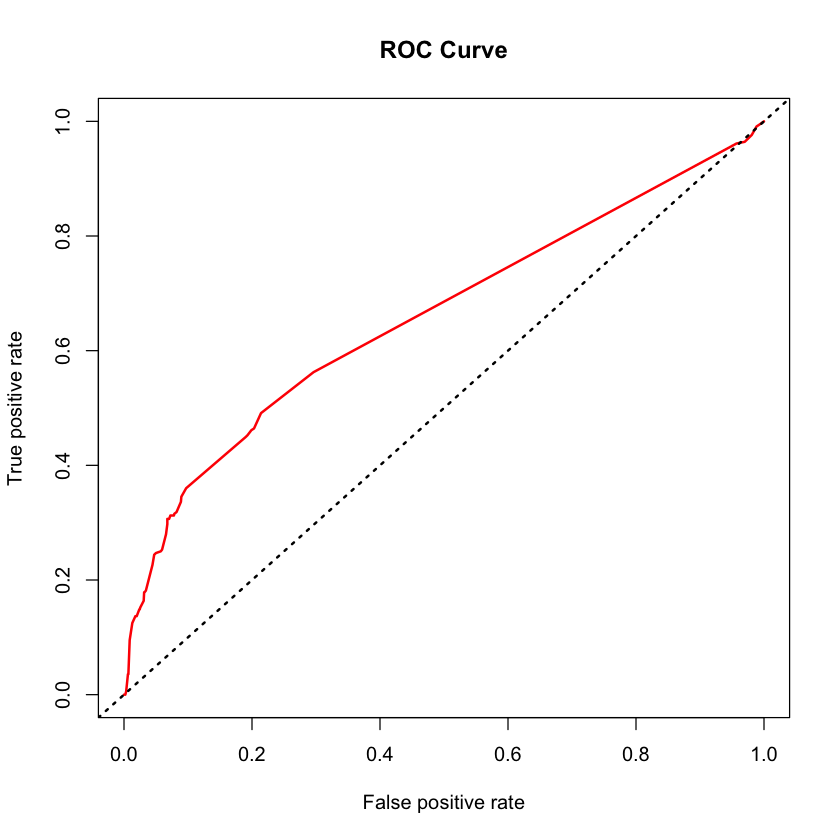

In [16]:
#error in below line
dtCaretTestPredictedProbability = predict(dt_caret_model, dt_test_data, type = "prob")
dtPredObj <- prediction(dtCaretTestPredictedProbability[2],dt_test_data$Status)
dtPerfObj <- performance(dtPredObj, "tpr","fpr")
#dev.off()
plot(dtPerfObj,main = "ROC Curve",col = 2,lwd = 2)
abline(a = 0,b = 1,lwd = 2,lty = 3,col = "black")
performance(dtPredObj, "auc")



#### End of Document

***
***
